In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Divar.csv')


C:\Users\Raven\AppData\Local\Temp\ipykernel_5552\670301169.py:3: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Divar.csv')


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سوال 3 امار توصیفی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
باتوجه به نمودار در میابیم در ماه تیرما اگهی اجاره زیاد میشود و حدودا در مرداد ماه به اوج خود میرسد همینطور برای فروش به همین شکل از ماه تیر و خرداد شروع به افزایش میابد و در و تا اخر سال یک روند را تی میکند
</font>
</p>

In [2]:
advertise_df = df.copy()
selling_word = 'فروش'
renting_word = 'اجاره'
advertise_df = advertise_df.loc[:, ['created_at_month',  'price_value', 'cat2_slug', 'cat3_slug']]
advertise_df["is_for_selling"] = (
    (advertise_df['cat2_slug'] == 'residential-sell') |
    (advertise_df['cat2_slug'] == 'commercial-sell') |
    (advertise_df['cat3_slug'] == 'apartment-sell') |
    (advertise_df['cat3_slug'] == 'shop-sell') |
    (advertise_df['cat3_slug'] == 'office-sell') |
    (advertise_df['cat3_slug'] == 'industry-agriculture-business-sell') |
    (advertise_df['cat3_slug'] == 'presell')
)
advertise_df['created_at_month'] = pd.to_datetime(df['created_at_month'])
sales_grouped_by_date = advertise_df.groupby([advertise_df['created_at_month'].dt.month, advertise_df['is_for_selling']]).size().reset_index(name='count')
sales_grouped_by_date

,created_at_month,is_for_selling,count
0,1,False,450
1,1,True,1649
2,2,False,225
3,2,True,1155
4,3,False,446
5,3,True,1466
6,4,False,1488
7,4,True,5727
8,5,False,35066
9,5,True,73754


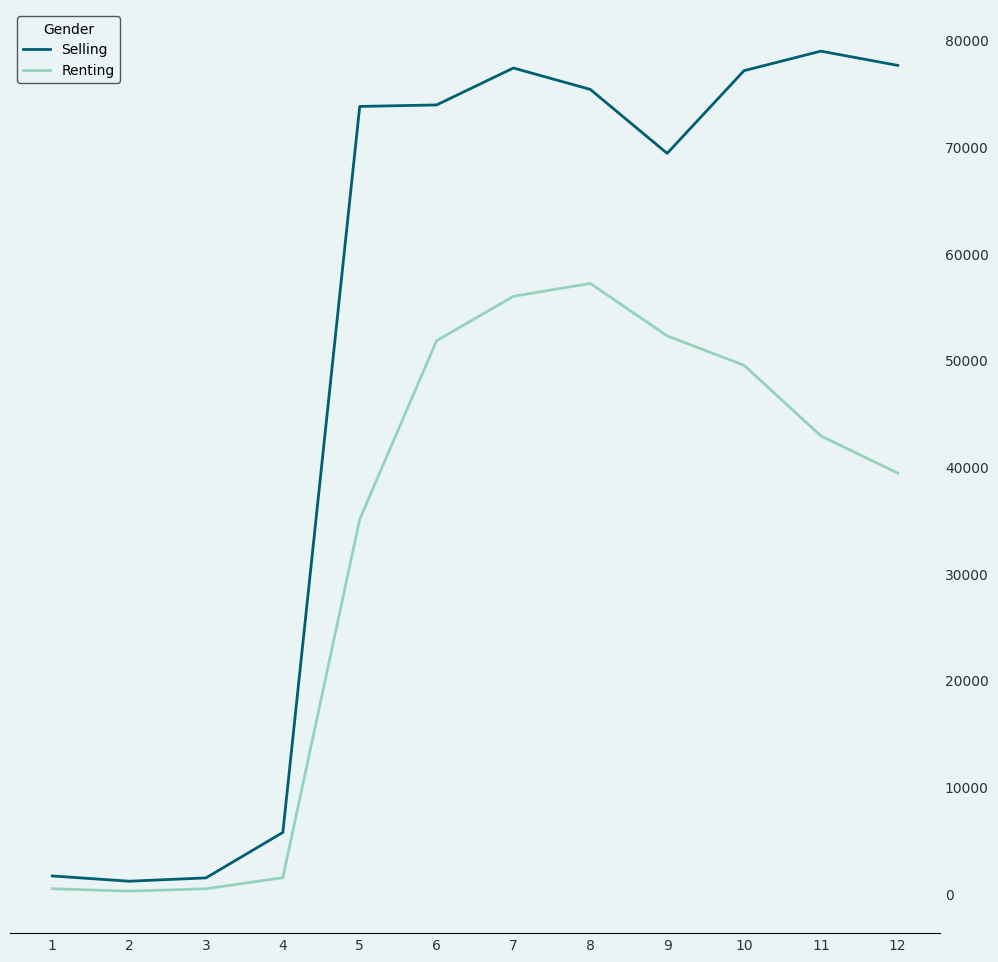

In [3]:
selling_df = sales_grouped_by_date[sales_grouped_by_date['is_for_selling'] == True]
renting_df = sales_grouped_by_date[sales_grouped_by_date['is_for_selling'] == False]
fig, ax = plt.subplots(figsize=(12, 12))
fig.patch.set_facecolor('#EAF4f4')
ax.set_facecolor('#EAF4f4')

ax.plot(selling_df['created_at_month'], selling_df['count'], color='#005f73', label='Selling', linewidth=2)
ax.plot(renting_df['created_at_month'], renting_df['count'], color='#94d2bd', label='Renting', linewidth=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis='x', length=0, colors='#22333b')
ax.tick_params(axis='y', length=0, colors='#22333b')

ax.set_xticks(range(1, 13))
ax.set_xticklabels(range(1, 13))

ax.yaxis.tick_right()  

legend = ax.legend(title='Gender')
legend.get_frame().set_facecolor('#EAF4f4')
legend.get_frame().set_edgecolor('#22333b')

plt.show()


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سوال 4 امار توصیفی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
هیستوگرام برای توضیع دسته بندی سطح 3
</font>
</p>

In [4]:
advertise_df = df.copy()
grouped_by_slug3 = advertise_df.groupby('cat3_slug').price_value.sum()
grouped_by_slug3

cat3_slug
apartment-rent                        4.060200e+09
apartment-sell                        4.701211e+15
house-villa-rent                      1.211111e+06
house-villa-sell                      1.873402e+15
industry-agriculture-business-rent    2.826722e+09
industry-agriculture-business-sell    1.684440e+14
office-rent                           1.569603e+09
office-sell                           1.133531e+14
partnership                           8.041111e+10
plot-old                              2.464506e+15
presell                               8.088917e+12
shop-rent                             6.115010e+09
shop-sell                             5.404387e+14
suite-apartment                       2.480000e+06
villa                                 7.000000e+05
workspace                             4.111110e+05
Name: price_value, dtype: float64

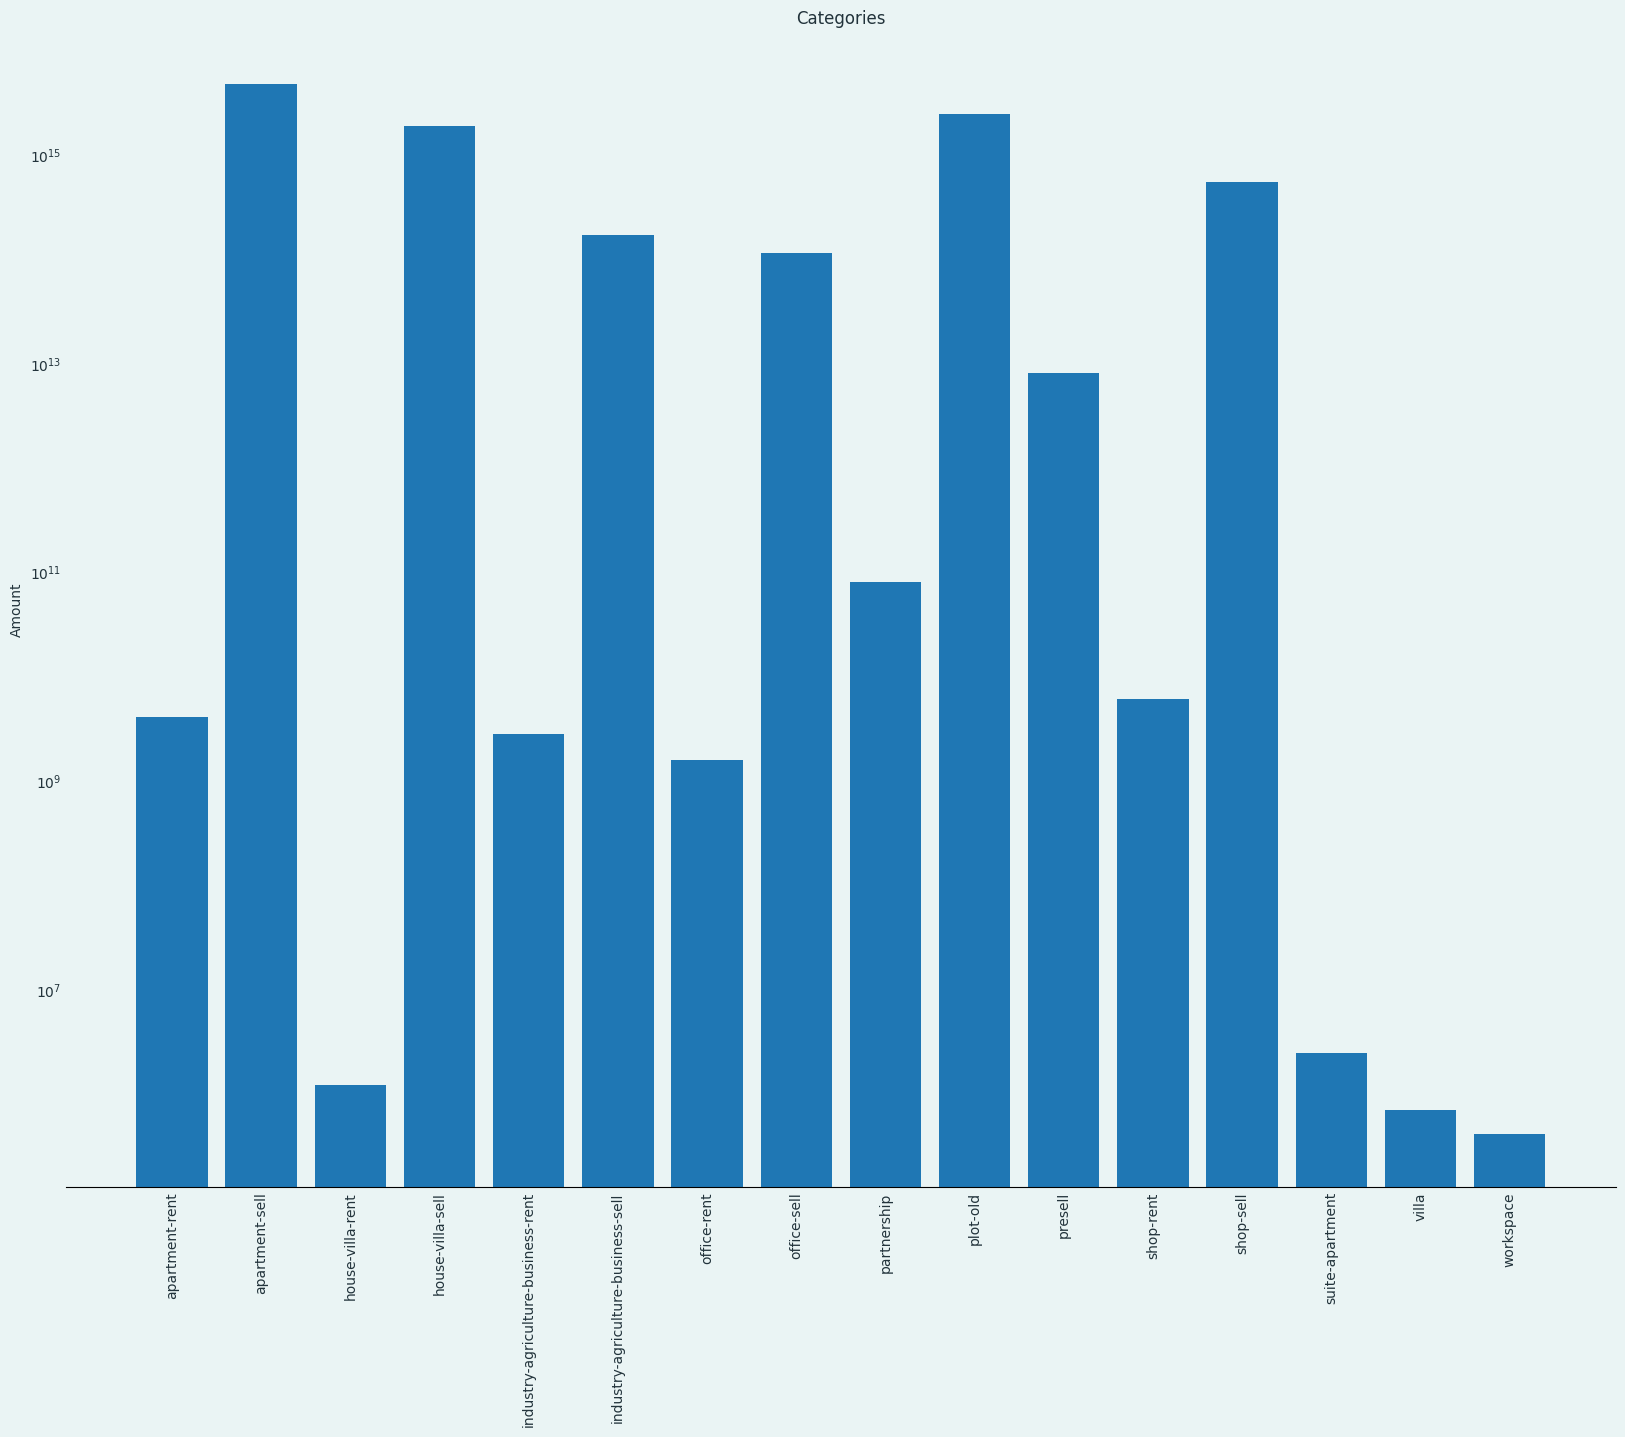

In [5]:
fig, ax = plt.subplots(figsize=(20, 15))
fig.patch.set_facecolor('#EAF4f4')
ax.set_facecolor('#EAF4f4')


bars  = ax.bar(grouped_by_slug3.index, grouped_by_slug3.values)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_yscale('log')

ax.set_title('Categories', fontsize=12,  color='#22333b')
ax.set_ylabel('Amount', fontsize=10, color='#22333b')

ax.tick_params(axis='x', colors='#22333b', labelrotation=90,  length=0)
ax.tick_params(axis='y', colors='#22333b', length=0)


plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سوال 1 ازمون فرض
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
باتوجه به نمودار تقریبا میشود دید که این از سال 24 میانگین متراژ  افت کرده است
و میشود این نتیجه را گرفت که با مهاجرت از شهرهای کوچک و بیشتر شدن تراکم میاگنین متراژ کمتر شده است
</font>
</p>

In [9]:
advertise_df = df.copy()
advertise_df = advertise_df[['city_slug', 'land_size', 'building_size', 'cat3_slug', 'cat2_slug', 'created_at_month']]
advertise_df["created_at_month"] = pd.to_datetime(advertise_df["created_at_month"]) 
city_df = pd.read_csv('iran_city_classification.csv')
city_df = city_df.rename(columns={'نام شهر': 'city_name', 'دسته‌بندی':'category_name'})
city_df = city_df.replace({'شهر کوچک':'small_city', 'کلان‌شهر':'big_city'})
advertise_df = pd.merge(advertise_df, city_df, left_on="city_slug", right_on="city_name", how="inner").drop('city_slug', axis=1)
advertise_df.cat3_slug.unique()
residental_df = advertise_df[
    (
        (advertise_df['cat2_slug'] == 'residential-rent') |
        (advertise_df['cat2_slug'] == 'residential-sell')
    )
]
groupedBuildingSize = residental_df.set_index("created_at_month").sort_index().resample("Y")['building_size'].mean().ffill()
groupedBuildingSize.index = groupedBuildingSize.index.year
groupedBuildingSize


C:\Users\Raven\AppData\Local\Temp\ipykernel_5552\3749154508.py:15: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  groupedBuildingSize = residental_df.set_index("created_at_month").sort_index().resample("Y")['building_size'].mean().ffill()


created_at_month
2020      80.000000
2021     189.500000
2022    1234.852941
2023     516.614035
2024    2634.191087
2025     660.117201
Name: building_size, dtype: float64

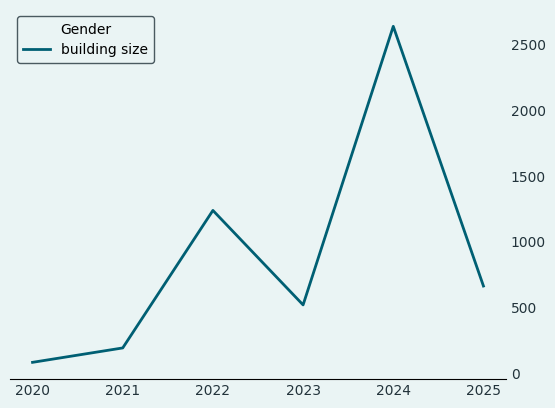

In [10]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('#EAF4f4')
ax.set_facecolor('#EAF4f4')

ax.plot(groupedBuildingSize.index, groupedBuildingSize.values, color='#005f73', label='building size', linewidth=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis='x', length=0, colors='#22333b')
ax.tick_params(axis='y', length=0, colors='#22333b')

ax.yaxis.tick_right()  

legend = ax.legend(title='Gender')
legend.get_frame().set_facecolor('#EAF4f4')
legend.get_frame().set_edgecolor('#22333b')

plt.show()